In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'c63fa35c-551c-4009-82c2-19916924e94f',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-08-27T06:59:22.124Z', 'error_code': 0, 'error_message': None, 'elapsed': 29, 'credit_count': 1, 'notice': None, 'total_count': 9985}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11651, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
# normalize and make it look better
type(data)

dict

In [3]:
import pandas as pd

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [4]:
df = pd.json_normalize(data["data"])
df["timestamp"] = pd.to_datetime("now")
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11651,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.974564e+07,1.974564e+07,False,NaN,1,NaN,NaN,None,2024-08-27T06:57:00.000Z,62771.137283,2.832710e+10,45.4103,-0.551653,-1.496358,2.867942,-6.998710,2.028692,-8.307462,1.239456e+12,56.2494,1.318194e+12,None,2024-08-27T06:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-27 09:59:50.355552
1,1027,Ethereum,ETH,ethereum,9246,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202989e+08,1.202989e+08,True,NaN,2,NaN,NaN,None,2024-08-27T06:56:00.000Z,2678.979516,1.244649e+10,30.0525,-0.752725,-2.209529,-0.005083,-16.850820,-22.366613,-30.512168,3.222783e+11,14.6182,3.222783e+11,None,2024-08-27T06:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-27 09:59:50.355552
2,825,Tether USDt,USDT,tether,95574,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.180393e+11,1.202563e+11,True,NaN,3,NaN,NaN,None,2024-08-27T06:56:00.000Z,1.000103,5.198205e+10,29.6154,-0.014823,-0.033565,-0.052379,0.010546,0.128431,0.131592,1.180515e+11,5.3544,1.202687e+11,None,2024-08-27T06:56:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-27 09:59:50.355552
3,1839,BNB,BNB,bnb,2220,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459353e+08,1.459353e+08,False,NaN,4,NaN,NaN,None,2024-08-27T06:56:00.000Z,552.713612,1.781818e+09,5.1112,-0.829223,-2.057141,-2.957829,-4.551857,-4.420268,-8.169014,8.066041e+10,3.6592,8.066041e+10,None,2024-08-27T06:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-27 09:59:50.355552
4,5426,Solana,SOL,solana,721,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.661600e+08,5.832000e+08,True,NaN,5,NaN,NaN,None,2024-08-27T06:56:00.000Z,158.030500,2.494875e+09,20.5264,-0.876312,-0.860687,7.380294,-13.151582,9.020482,-8.520061,7.366750e+10,3.3413,9.216339e+10,None,2024-08-27T06:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-27 09:59:50.355552
5,3408,USDC,USDC,usd-coin,21682,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.451702e+10,3.451702e+10,False,NaN,6,NaN,NaN,None,2024-08-27T06:56:00.000Z,0.999910,5.398875e+09,39.9319,-0.001505,-0.013711,-0.011246,-0.010812,0.006584,-0.010266,3.451392e+10,1.5658,3.451392e+10,None,2024-08-27T06:56:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-27 09:59:50.355552
6,52,XRP,XRP,xrp,1372,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.618009e+10,9.998732e+10,False,NaN,7,NaN,NaN,None,2024-08-27T06:57:00.000Z,0.590939,1.048712e+09,21.4423,-0.419480,-0.590059,-3.449395,-1.608674,23.992471,11.690335,3.319902e+10,1.5058,5.909392e+10,None,2024-08-27T06:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-27 09:59:50.355552
7,74,Dogecoin,DOGE,dogecoin,1047,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.457038e+11,1.457038e+11,True,NaN,8,NaN,NaN,None,2024-08-27T06:56:00.000Z,0.105842,5.298965e+08,-3.2027,-0.594938,-2.706223,0.607318,-18.645354,-15.512304,-37.274777,1.542159e+10,0.6995,1.542159e+10,None,2024-08-27T06:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-27 09:59:50.355552
8,1958,TRON,TRX,tron,1018,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8.68290

In [5]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'c63fa35c-551c-4009-82c2-19916924e94f',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
       print(e)

    df2 = pd.json_normalize(data["data"])
    df2["timestamp"] = pd.to_datetime("now")
    df = pd.concat([df, df2], ignore_index=True)

    if not os.path.isfile(r"C:\Users\Sebbie\Downloads\dataset\API-1.csv"):
        df.to_csv(r"C:\Users\Sebbie\Downloads\dataset\API-1.csv", header = "column.names")
    else:
        df.to_csv(r"C:\Users\Sebbie\Downloads\dataset\API-1.csv", mode = "a", header = False)

In [6]:
import os
from time import time
from time import sleep

for i in range(1):
    api_runner()
    print("api runner completed successfully")
    sleep(60) # sleep for 1 minute and run again

    # exit()

{'status': {'timestamp': '2024-08-27T06:59:50.535Z', 'error_code': 0, 'error_message': None, 'elapsed': 22, 'credit_count': 1, 'notice': None, 'total_count': 9985}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11651, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [10]:
df3 = pd.read_csv(r"C:\Users\Sebbie\Downloads\dataset\API-1.csv")
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11651,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.974564e+07,1.974564e+07,False,NaN,1,NaN,NaN,NaN,2024-08-27T06:57:00.000Z,62771.137283,2.832710e+10,45.4103,-0.551653,-1.496358,2.867942,-6.998710,2.028692,-8.307462,1.239456e+12,56.2494,1.318194e+12,NaN,2024-08-27T06:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-27 09:59:50.355552
1,1,1027,Ethereum,ETH,ethereum,9246,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202989e+08,1.202989e+08,True,NaN,2,NaN,NaN,NaN,2024-08-27T06:56:00.000Z,2678.979516,1.244649e+10,30.0525,-0.752725,-2.209529,-0.005083,-16.850820,-22.366613,-30.512168,3.222783e+11,14.6182,3.222783e+11,NaN,2024-08-27T06:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-27 09:59:50.355552
2,2,825,Tether USDt,USDT,tether,95574,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.180393e+11,1.202563e+11,True,NaN,3,NaN,NaN,NaN,2024-08-27T06:56:00.000Z,1.000103,5.198205e+10,29.6154,-0.014823,-0.033565,-0.052379,0.010546,0.128431,0.131592,1.180515e+11,5.3544,1.202687e+11,NaN,2024-08-27T06:56:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-27 09:59:50.355552
3,3,1839,BNB,BNB,bnb,2220,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.459353e+08,1.459353e+08,False,NaN,4,NaN,NaN,NaN,2024-08-27T06:56:00.000Z,552.713612,1.781818e+09,5.1112,-0.829223,-2.057141,-2.957829,-4.551857,-4.420268,-8.169014,8.066041e+10,3.6592,8.066041e+10,NaN,2024-08-27T06:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-27 09:59:50.355552
4,4,5426,Solana,SOL,solana,721,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.661600e+08,5.832000e+08,True,NaN,5,NaN,NaN,NaN,2024-08-27T06:56:00.000Z,158.030500,2.494875e+09,20.5264,-0.876312,-0.860687,7.380294,-13.151582,9.020482,-8.520061,7.366750e+10,3.3413,9.216339e+10,NaN,2024-08-27T06:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-27 09:59:50.355552
5,5,3408,USDC,USDC,usd-coin,21682,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.451702e+10,3.451702e+10,False,NaN,6,NaN,NaN,NaN,2024-08-27T06:56:00.000Z,0.999910,5.398875e+09,39.9319,-0.001505,-0.013711,-0.011246,-0.010812,0.006584,-0.010266,3.451392e+10,1.5658,3.451392e+10,NaN,2024-08-27T06:56:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-27 09:59:50.355552
6,6,52,XRP,XRP,xrp,1372,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.618009e+10,9.998732e+10,False,NaN,7,NaN,NaN,NaN,2024-08-27T06:57:00.000Z,0.590939,1.048712e+09,21.4423,-0.419480,-0.590059,-3.449395,-1.608674,23.992471,11.690335,3.319902e+10,1.5058,5.909392e+10,NaN,2024-08-27T06:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-27 09:59:50.355552
7,7,74,Dogecoin,DOGE,dogecoin,1047,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.457038e+11,1.457038e+11,True,NaN,8,NaN,NaN,NaN,2024-08-27T06:56:00.000Z,0.105842,5.298965e+08,-3.2027,-0.594938,-2.706223,0.607318,-18.645354,-15.512304,-37.274777,1.542159e+10,0.6995,1.542159e+10,NaN,2024-08-27T06:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-27 09:59:50.355552
8,8,1958,TRON,TRX,tron,1018,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...

In [7]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11651,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.974564e+07,1.974564e+07,False,NaN,1,NaN,NaN,None,2024-08-27T06:57:00.000Z,62771.137283,2.832710e+10,45.4103,-0.551653,-1.496358,2.867942,-6.998710,2.028692,-8.307462,1.239456e+12,56.2494,1.318194e+12,None,2024-08-27T06:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-27 09:59:50.355552
1,1027,Ethereum,ETH,ethereum,9246,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202989e+08,1.202989e+08,True,NaN,2,NaN,NaN,None,2024-08-27T06:56:00.000Z,2678.979516,1.244649e+10,30.0525,-0.752725,-2.209529,-0.005083,-16.850820,-22.366613,-30.512168,3.222783e+11,14.6182,3.222783e+11,None,2024-08-27T06:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-27 09:59:50.355552
2,825,Tether USDt,USDT,tether,95574,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.180393e+11,1.202563e+11,True,NaN,3,NaN,NaN,None,2024-08-27T06:56:00.000Z,1.000103,5.198205e+10,29.6154,-0.014823,-0.033565,-0.052379,0.010546,0.128431,0.131592,1.180515e+11,5.3544,1.202687e+11,None,2024-08-27T06:56:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-27 09:59:50.355552
3,1839,BNB,BNB,bnb,2220,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459353e+08,1.459353e+08,False,NaN,4,NaN,NaN,None,2024-08-27T06:56:00.000Z,552.713612,1.781818e+09,5.1112,-0.829223,-2.057141,-2.957829,-4.551857,-4.420268,-8.169014,8.066041e+10,3.6592,8.066041e+10,None,2024-08-27T06:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-27 09:59:50.355552
4,5426,Solana,SOL,solana,721,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.661600e+08,5.832000e+08,True,NaN,5,NaN,NaN,None,2024-08-27T06:56:00.000Z,158.030500,2.494875e+09,20.5264,-0.876312,-0.860687,7.380294,-13.151582,9.020482,-8.520061,7.366750e+10,3.3413,9.216339e+10,None,2024-08-27T06:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-27 09:59:50.355552
5,3408,USDC,USDC,usd-coin,21682,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.451702e+10,3.451702e+10,False,NaN,6,NaN,NaN,None,2024-08-27T06:56:00.000Z,0.999910,5.398875e+09,39.9319,-0.001505,-0.013711,-0.011246,-0.010812,0.006584,-0.010266,3.451392e+10,1.5658,3.451392e+10,None,2024-08-27T06:56:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-27 09:59:50.355552
6,52,XRP,XRP,xrp,1372,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.618009e+10,9.998732e+10,False,NaN,7,NaN,NaN,None,2024-08-27T06:57:00.000Z,0.590939,1.048712e+09,21.4423,-0.419480,-0.590059,-3.449395,-1.608674,23.992471,11.690335,3.319902e+10,1.5058,5.909392e+10,None,2024-08-27T06:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-27 09:59:50.355552
7,74,Dogecoin,DOGE,dogecoin,1047,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.457038e+11,1.457038e+11,True,NaN,8,NaN,NaN,None,2024-08-27T06:56:00.000Z,0.105842,5.298965e+08,-3.2027,-0.594938,-2.706223,0.607318,-18.645354,-15.512304,-37.274777,1.542159e+10,0.6995,1.542159e+10,None,2024-08-27T06:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-27 09:59:50.355552
8,1958,TRON,TRX,tron,1018,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8.68290

In [12]:
pd.set_option("display.float_format", lambda x: "%.5f" % x)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11651,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19745637.00000,19745637.00000,False,NaN,1,NaN,NaN,None,2024-08-27T06:57:00.000Z,62771.13728,28327097611.32428,45.41030,-0.55165,-1.49636,2.86794,-6.99871,2.02869,-8.30746,1239456090862.65234,56.24940,1318193882938.07007,None,2024-08-27T06:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-27 09:59:50.355552
1,1027,Ethereum,ETH,ethereum,9246,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120298912.44583,120298912.44583,True,NaN,2,NaN,NaN,None,2024-08-27T06:56:00.000Z,2678.97952,12446491788.89562,30.05250,-0.75272,-2.20953,-0.00508,-16.85082,-22.36661,-30.51217,322278322240.39258,14.61820,322278322240.39001,None,2024-08-27T06:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-27 09:59:50.355552
2,825,Tether USDt,USDT,tether,95574,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,118039332678.20683,120256329980.56221,True,NaN,3,NaN,NaN,None,2024-08-27T06:56:00.000Z,1.00010,51982050910.84921,29.61540,-0.01482,-0.03356,-0.05238,0.01055,0.12843,0.13159,118051464505.67215,5.35440,120268689666.22000,None,2024-08-27T06:56:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-27 09:59:50.355552
3,1839,BNB,BNB,bnb,2220,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145935274.95327,145935274.95327,False,NaN,4,NaN,NaN,None,2024-08-27T06:56:00.000Z,552.71361,1781818405.05228,5.11120,-0.82922,-2.05714,-2.95783,-4.55186,-4.42027,-8.16901,80660412929.40036,3.65920,80660412929.39999,None,2024-08-27T06:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-27 09:59:50.355552
4,5426,Solana,SOL,solana,721,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,466160045.33295,583200045.52259,True,NaN,5,NaN,NaN,None,2024-08-27T06:56:00.000Z,158.03050,2494874610.55970,20.52640,-0.87631,-0.86069,7.38029,-13.15158,9.02048,-8.52006,73667504958.76657,3.34130,92163394687.34000,None,2024-08-27T06:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-27 09:59:50.355552
5,3408,USDC,USDC,usd-coin,21682,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,34517021300.93714,34517021300.93714,False,NaN,6,NaN,NaN,None,2024-08-27T06:56:00.000Z,0.99991,5398874760.19483,39.93190,-0.00150,-0.01371,-0.01125,-0.01081,0.00658,-0.01027,34513916528.60387,1.56580,34513916528.60000,None,2024-08-27T06:56:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-27 09:59:50.355552
6,52,XRP,XRP,xrp,1372,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56180094752.00000,99987315360.00000,False,NaN,7,NaN,NaN,None,2024-08-27T06:57:00.000Z,0.59094,1048711788.82594,21.44230,-0.41948,-0.59006,-3.44940,-1.60867,23.99247,11.69034,33199020592.88121,1.50580,59093920612.69000,None,2024-08-27T06:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-27 09:59:50.355552
7,74,Dogecoin,DOGE,dogecoin,1047,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,145703776383.70520,145703776383.70520,True,NaN,8,NaN,NaN,None,2024-08-27T06:56:00.000Z,0.10584,529896463.78079,-3.20270,-0.59494,-2.70622,0.60732,-18.64535,-15.51230,-37.27478,15421594721.34628,0.69950,15421594721.35000,None,2024-08-27T06:56:00.00

In [16]:
# group

df4 = df.groupby("name", sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d']].mean()
df4

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.55165,-1.49636,2.86794,-6.99871,2.02869,-8.30746
Ethereum,-0.75272,-2.20953,-0.00508,-16.85082,-22.36661,-30.51217
Tether USDt,-0.01482,-0.03356,-0.05238,0.01055,0.12843,0.13159
BNB,-0.82922,-2.05714,-2.95783,-4.55186,-4.42027,-8.16901
Solana,-0.87631,-0.86069,7.38029,-13.15158,9.02048,-8.52006
USDC,-0.00150,-0.01371,-0.01125,-0.01081,0.00658,-0.01027
XRP,-0.41948,-0.59006,-3.44940,-1.60867,23.99247,11.69034
Dogecoin,-0.59494,-2.70622,0.60732,-18.64535,-15.51230,-37.27478
TRON,-0.43608,-2.51734,12.40323,18.05786,32.56245,45.18666


In [22]:
df5 = df4.stack()
df5

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.55165
             quote.USD.percent_change_24h    -1.49636
             quote.USD.percent_change_7d      2.86794
             quote.USD.percent_change_30d    -6.99871
             quote.USD.percent_change_60d     2.02869
             quote.USD.percent_change_90d    -8.30746
Ethereum     quote.USD.percent_change_1h     -0.75272
             quote.USD.percent_change_24h    -2.20953
             quote.USD.percent_change_7d     -0.00508
             quote.USD.percent_change_30d   -16.85082
             quote.USD.percent_change_60d   -22.36661
             quote.USD.percent_change_90d   -30.51217
Tether USDt  quote.USD.percent_change_1h     -0.01482
             quote.USD.percent_change_24h    -0.03356
             quote.USD.percent_change_7d     -0.05238
             quote.USD.percent_change_30d     0.01055
             quote.USD.percent_change_60d     0.12843
             quote.USD.percent_change_90

In [23]:
df.columns

Index(['id', 'name', 'symbol', 'slug', 'num_market_pairs', 'date_added',
       'tags', 'max_supply', 'circulating_supply', 'total_supply',
       'infinite_supply', 'platform', 'cmc_rank',
       'self_reported_circulating_supply', 'self_reported_market_cap',
       'tvl_ratio', 'last_updated', 'quote.USD.price', 'quote.USD.volume_24h',
       'quote.USD.volume_change_24h', 'quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d', 'quote.USD.market_cap',
       'quote.USD.market_cap_dominance', 'quote.USD.fully_diluted_market_cap',
       'quote.USD.tvl', 'quote.USD.last_updated', 'platform.id',
       'platform.name', 'platform.symbol', 'platform.slug',
       'platform.token_address', 'timestamp'],
      dtype='object')

In [24]:
type(df5)

pandas.core.series.Series

In [26]:
df6 = df5.to_frame(name = "values")
df6

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.55165
            quote.USD.percent_change_24h  -1.49636
            quote.USD.percent_change_7d    2.86794
            quote.USD.percent_change_30d  -6.99871
            quote.USD.percent_change_60d   2.02869
            quote.USD.percent_change_90d  -8.30746
Ethereum    quote.USD.percent_change_1h   -0.75272
            quote.USD.percent_change_24h  -2.20953
            quote.USD.percent_change_7d   -0.00508
            quote.USD.percent_change_30d -16.85082
            quote.USD.percent_change_60d -22.36661
            quote.USD.percent_change_90d -30.51217
Tether USDt quote.USD.percent_change_1h   -0.01482
            quote.USD.percent_change_24h  -0.03356
            quote.USD.percent_change_7d   -0.05238
            quote.USD.percent_change_30d   0.01055
            quote.USD.percent_change_60d   0.12843
            quote.USD.percent_change_90d   0.13159
BNB         quote.USD.percent_change_1h   -0.82922
            quote.USD.percent_change_24h  -2.05714
            quote.USD.percent_change_7d   -2.95783
            quote.USD.percent_change_30d  -4.55186
            quote.USD.percent_change_60d  -4.42027
            quote.USD.percent_change_90d  -8.16901
Solana      quote.USD.percent_change_1h   -0.87631
            quote.USD.percent_change_24h  -0.86069
            quote.USD.percent_change_7d    7.38029
            quote.USD.percent_change_30d -13.15158
            quote.USD.percent_change_60d   9.02048
            quote.USD.percent_change_90d  -8.52006
USDC        quote.USD.percent_change_1h   -0.00150
            quote.USD.percent_change_24h  -0.01371
            quote.USD.percent_change_7d   -0.01125
            quote.USD.percent_change_30d  -0.01081
            quote.USD.percent_change_60d   0.00658
            quote.USD.percent_change_90d  -0.01027
XRP         quote.USD.percent_change_1h   -0.41948
            quote.USD.percent_change_24h  -0.59006
            quote.USD.percent_change_7d   -3.44940
            quote.USD.percent_change_30d  -1.60867
            quote.USD.percent_change_60d  23.99247
            quote.USD.percent_change_90d  11.69034
Dogecoin    quote.USD.percent_change_1h   -0.59494
            quote.USD.percent_change_24h  -2.70622
            quote.USD.percent_change_7d    0.60732
            quote.USD.percent_change_30d -18.64535
            quote.USD.percent_change_60d -15.51230
            quote.USD.percent_change_90d -37.27478
TRON        quote.USD.percent_change_1h   -0.43608
            quote.USD.percent_change_24h  -2.51734
            quote.USD.percent_change_7d   12.40323
            quote.USD.percent_change_30d  18.05786
            quote.USD.percent_change_60d  32.56245
            quote.USD.percent_change_90d  45.18666
Toncoin     quote.USD.percent_change_1h   -0.87450
            quote.USD.percent_change_24h  -4.74322
            quote.USD.percent_change_7d  -21.73845
            quote.USD.percent_change_30d -17.95681
            quote.USD.percent_change_60d -29.61891
            quote.USD.percent_change_90d -18.30066
Cardano     quote.USD.percent_change_1h   -1.05842
            quote.USD.percent_change_24h  -3.26630
            quote.USD.percent_change_7d    7.21614
            quote.USD.percent_change_30d -10.51115
            quote.USD.percent_change_60d  -4.96737
            quote.USD.percent_change_90d -20.20115
Avalanche   quote.USD.percent_change_1h   -0.67359
            quote.USD.percent_change_24h  -1.54172
            quote.USD.percent_change_7d   20.80236
            quote.USD.percent_change_30d  -4.35683
            quote.USD.percent_change_60d  -5.87334
            quote.USD.percent_change_90d -28.93757
Shiba Inu   quote.USD.percent_change_1h   -0.72411
            quote.USD.percent_change_24h  -1.44940
            quote.USD.percent_change_7d    6.66634
            quote.USD.percent_change_30d -12.67523
            quote.USD.percent_change_60d -15.12024
            quo

In [30]:
# giving an index

index = pd.Index(range(90))
df7 = df6.reset_index()
df7

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.55165
1,Bitcoin,quote.USD.percent_change_24h,-1.49636
2,Bitcoin,quote.USD.percent_change_7d,2.86794
3,Bitcoin,quote.USD.percent_change_30d,-6.99871
4,Bitcoin,quote.USD.percent_change_60d,2.02869
5,Bitcoin,quote.USD.percent_change_90d,-8.30746
6,Ethereum,quote.USD.percent_change_1h,-0.75272
7,Ethereum,quote.USD.percent_change_24h,-2.20953
8,Ethereum,quote.USD.percent_change_7d,-0.00508
9,Ethereum,quote.USD.percent_change_30d,-16.85082


In [42]:
df8 = df7.rename(columns = {"level_1" : "percent_change"})
df8

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.55165
1,Bitcoin,quote.USD.percent_change_24h,-1.49636
2,Bitcoin,quote.USD.percent_change_7d,2.86794
3,Bitcoin,quote.USD.percent_change_30d,-6.99871
4,Bitcoin,quote.USD.percent_change_60d,2.02869
5,Bitcoin,quote.USD.percent_change_90d,-8.30746
6,Ethereum,quote.USD.percent_change_1h,-0.75272
7,Ethereum,quote.USD.percent_change_24h,-2.20953
8,Ethereum,quote.USD.percent_change_7d,-0.00508
9,Ethereum,quote.USD.percent_change_30d,-16.85082


In [44]:
df8["percent_change"] = df8["percent_change"].replace(["quote.USD.percent_change_1h", "quote.USD.percent_change_24h", "quote.USD.percent_change_7d", "quote.USD.percent_change_30d", "quote.USD.percent_change_60d", "quote.USD.percent_change_90d"], ["1h", "24h", "7d", "30d", "60d", "90d"])
df8

,name,percent_change,values
0,Bitcoin,1h,-0.55165
1,Bitcoin,24h,-1.49636
2,Bitcoin,7d,2.86794
3,Bitcoin,30d,-6.99871
4,Bitcoin,60d,2.02869
5,Bitcoin,90d,-8.30746
6,Ethereum,1h,-0.75272
7,Ethereum,24h,-2.20953
8,Ethereum,7d,-0.00508
9,Ethereum,30d,-16.85082


In [38]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt

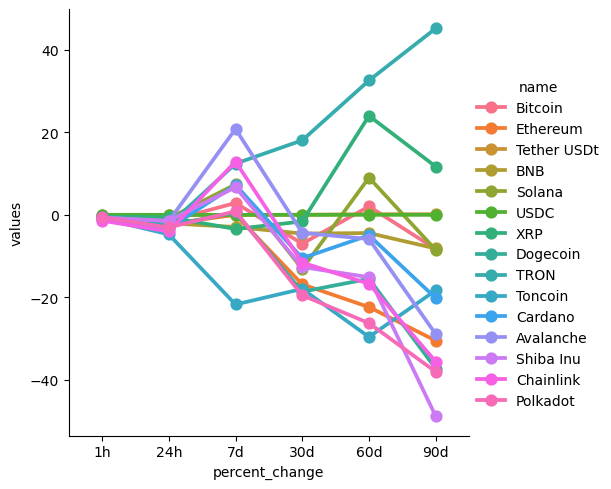

In [45]:
sns.catplot(x = "percent_change", y = "values", hue = "name", data = df8, kind = "point")

In [56]:
df9 = df[["name", "quote.USD.price", "timestamp"]]
df9 = df9.query("name == 'Chainlink'")
df9

,name,quote.USD.price,timestamp
13,Chainlink,11.86052,2024-08-27 09:59:50.355552
28,Chainlink,11.86052,2024-08-27 09:59:51.615897


In [60]:
df["name"].sum

<bound method Series.sum of 0         Bitcoin
1        Ethereum
2     Tether USDt
3             BNB
4          Solana
5            USDC
6             XRP
7        Dogecoin
8            TRON
9         Toncoin
10        Cardano
11      Avalanche
12      Shiba Inu
13      Chainlink
14       Polkadot
15        Bitcoin
16       Ethereum
17    Tether USDt
18            BNB
19         Solana
20           USDC
21            XRP
22       Dogecoin
23           TRON
24        Toncoin
25        Cardano
26      Avalanche
27      Shiba Inu
28      Chainlink
29       Polkadot
Name: name, dtype: object>

<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

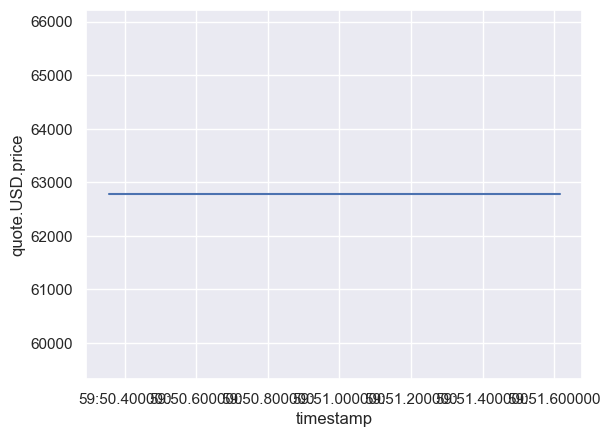

In [54]:
sns.set_theme(style = "darkgrid")

sns.lineplot(x = "timestamp", y = "quote.USD.price", data = df9)

In [1]:
!git config --global user.name

Sebbie Evayo


In [2]:
!git config --global user.email

sebbievilar2@gmail.com


In [3]:
!git init

Initialized empty Git repository in C:/Users/Sebbie/.git/


In [ ]:
!git add .

In [ ]:
!git commit -m "create api pull request to coinmarket.com"